## Experimentación - Predicción
- Se intentará predecir el valor de la variable 'fallecido', la cual contiene 2 valores (0 -> no fallece, 1 --> fallece)

- La variable surge a partir de la variable clasificacion_resumen (del dataset Casos COVID-19 provisto por el Ministerio de Salud de Argentina) luego de realizar el proceso de limpieza y pre-procesado disponible en el Notebook Limpieza_Preprocesado_Covid19Casos.ipynb

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Importamos librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Levantamos el Dataset
- Previo a realizar este paso es necesario ejecutar el Notebook: Limpieza_Preprocesado_Covid19Casos.ipynb

In [3]:
PATH = "./data/"
FILE_NAME = 'covid19_limpio.csv'
FULL_NAME = PATH + FILE_NAME

In [4]:
df = pd.read_csv(FULL_NAME)

In [5]:
dataset = df.copy(deep=True)

In [6]:
dataset.drop(dataset[dataset.covid_19_confirmado == 0].index, inplace=True)
dataset.drop(['covid_19_confirmado'], axis=1, inplace=True)
dataset

,edad,sepi_apertura,cuidado_intensivo,fallecido,asistencia_respiratoria_mecanica,financiamiento_publico,sexo_f,sexo_m,sexo_nr,pcia_rec_eq_pcia_car,...,residencia_provincia_rio_negro,residencia_provincia_salta,residencia_provincia_san_juan,residencia_provincia_san_luis,residencia_provincia_santa_cruz,residencia_provincia_santa_fe,residencia_provincia_santiago_del_estero,residencia_provincia_tierra_del_fuego,residencia_provincia_tucuman,fecha_di_dif_fecha_ap
4,26,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,24
7,7,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11,29,23,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,61,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
18,22,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784807,73,23,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,17
1784808,40,23,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,120
1784810,50,23,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1784812,37,23,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,12


In [7]:
dataset = dataset.dropna()

## Variable target: fallecido

0    732767
1     24250
Name: fallecido, dtype: int64


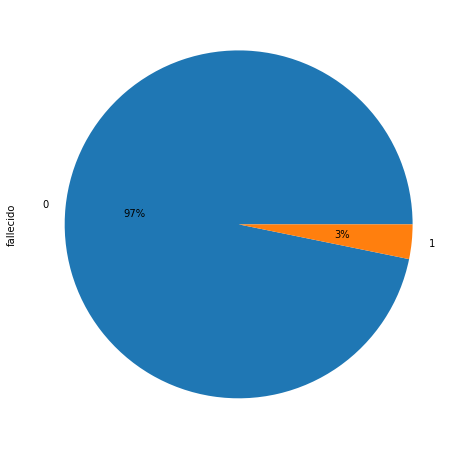

In [8]:
print(dataset.fallecido.value_counts())
dataset.fallecido.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8, 8))

### Referencias
- 0: no fallece 
- 1: fallece 

### Separar los conjuntos de train y test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Eliminamos la Feature fallecido porque añade información si lo que intentamos predecir es la variable covid_19_confirmado
feature_names = list(dataset.columns)
feature_names.remove('fallecido')
feature_names

['edad',
 'sepi_apertura',
 'cuidado_intensivo',
 'asistencia_respiratoria_mecanica',
 'financiamiento_publico',
 'sexo_f',
 'sexo_m',
 'sexo_nr',
 'pcia_rec_eq_pcia_car',
 'residencia_provincia_buenos_aires',
 'residencia_provincia_caba',
 'residencia_provincia_catamarca',
 'residencia_provincia_chaco',
 'residencia_provincia_chubut',
 'residencia_provincia_Corrientes',
 'residencia_provincia_cordoba',
 'residencia_provincia_entre_rios',
 'residencia_provincia_formosa',
 'residencia_provincia_jujuy',
 'residencia_provincia_la_pampa',
 'residencia_provincia_la_rioja',
 'residencia_provincia_mendoza',
 'residencia_provincia_misiones',
 'residencia_provincia_neuquen',
 'residencia_provincia_rio_negro',
 'residencia_provincia_salta',
 'residencia_provincia_san_juan',
 'residencia_provincia_san_luis',
 'residencia_provincia_santa_cruz',
 'residencia_provincia_santa_fe',
 'residencia_provincia_santiago_del_estero',
 'residencia_provincia_tierra_del_fuego',
 'residencia_provincia_tucuman',
 

In [11]:
X = dataset[feature_names]
y = dataset['fallecido']

In [12]:
X.shape, y.shape

((757017, 34), (757017,))

#### Train - Test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((681315, 34), (75702, 34), (681315,), (75702,))

#### Train - Validation

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.9, random_state=0)

In [16]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((613183, 34), (68132, 34), (613183,), (68132,))

In [17]:
INPUT_COLUMNS = X_train.shape[1]
INPUT_COLUMNS

34

### StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.fit_transform(X_val)
X_test_std = scaler.fit_transform(X_test)

X_train_std = np.clip(X_train_std, -5, 5)
X_val_std = np.clip(X_val_std, -5, 5)
X_test_std = np.clip(X_test_std, -5, 5)

### Initial Bias

In [19]:
pos = dataset[dataset.fallecido==1].shape[0]
neg = dataset[dataset.fallecido==0].shape[0]
total = dataset.shape[0]

initial_bias = np.log([pos/neg])
initial_bias

array([-3.40841116])

In [20]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorf

## Modelado

In [21]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras

In [22]:
# Hyperparameters
N_EPOCHS = 50
BATCH_SIZE = 1024

In [23]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Source: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

In [24]:
METRICS = [
      f1_score,
]

In [25]:
def make_model(metrics = METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(2048, activation='relu', input_shape=(INPUT_COLUMNS,)),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(2, activation='softmax', bias_initializer=output_bias),
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=metrics)
    
    return model

In [26]:
mlp_model = make_model(output_bias=initial_bias)
mlp_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              71680     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
____

In [27]:
path_checkpoint = "./models/best_model_class_nn_3.h5"
#Callbacks
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint(path_checkpoint, monitor='val_f1_score', mode='max', verbose=1, save_best_only=True)

In [28]:
history_mlp = mlp_model.fit(
    X_train_std, 
    y_train_cat,
    epochs=N_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(
        X_val_std,
        y_val_cat,
    ),
    callbacks = [early_stopping, model_checkpoint]
)

Train on 613183 samples, validate on 68132 samples
Epoch 1/50
612352/613183 [============================>.] - ETA: 0s - loss: 0.0995 - f1_score: 0.9658
Epoch 00001: val_f1_score improved from -inf to 0.96790, saving model to ./models/best_model_class_nn_3.h5
613183/613183 [==============================] - 13s 21us/sample - loss: 0.0995 - f1_score: 0.9659 - val_loss: 0.1856 - val_f1_score: 0.9679
Epoch 2/50
612352/613183 [============================>.] - ETA: 0s - loss: 0.0910 - f1_score: 0.9680
Epoch 00002: val_f1_score did not improve from 0.96790
613183/613183 [==============================] - 12s 20us/sample - loss: 0.0911 - f1_score: 0.9680 - val_loss: 0.1546 - val_f1_score: 0.9679
Epoch 3/50
612352/613183 [============================>.] - ETA: 0s - loss: 0.0904 - f1_score: 0.9680
Epoch 00003: val_f1_score did not improve from 0.96790
613183/613183 [==============================] - 12s 20us/sample - loss: 0.0904 - f1_score: 0.9680 - val_loss: 0.1792 - val_f1_score: 0.9679
Epo

### Evaluación del Modelo

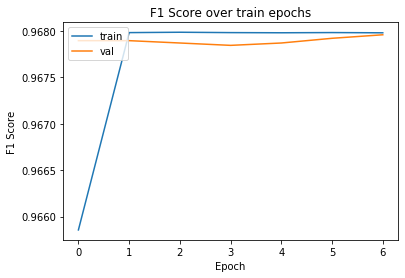

In [29]:
%matplotlib inline

plt.plot(history_mlp.history['f1_score'], label='train')
plt.plot(history_mlp.history['val_f1_score'], label='val')
plt.title('F1 Score over train epochs')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [30]:
print('Max MLP F1 Score train: ', max(history_mlp.history['f1_score']))
print('Max MLP F1 Score validation: ', max(history_mlp.history['val_f1_score']))

Max MLP F1 Score train:  0.96798587
Max MLP F1 Score validation:  0.96795857


#### Evaluación sobre el conjunto de Test

In [31]:
result = mlp_model.evaluate(X_test_std, y_test_cat, verbose=1)

75702/75702 [==============================] - 2s 32us/sample - loss: 0.2752 - f1_score: 0.9679


In [32]:
_, f1_score_result = result

In [33]:
print('F1 Score TEST: ' + str(f1_score_result))

F1 Score TEST: 0.96789145


### Predicciones sobre el conjunto de Test

In [34]:
import random as rnd

In [35]:
def pre_processing(x):
    x = x[feature_names].values
    x = np.reshape(x,(-1, 1))
    x = scaler.fit_transform(x)
    x = np.clip(x, -5, 5)

    return np.array([x.flatten()])

In [36]:
classes = {
    0: 'Sobrevive',
    1: 'Fallece'
}

In [37]:
def predict_examples(indexes, print_result=False):
    cant_correctas = 0
    cant_totales = len(indexes)
    cant_pos = 0
    predict = []
    
    for index in indexes:
        x_predict = X_test.iloc[index]
        y_real = y_test.iloc[index]
        if y_real == 1:
            cant_pos += 1
            
        x_predict = pre_processing(x_predict)
        prediction = mlp_model.predict(x_predict)
        y_predict = np.argmax(prediction)
        predict.append(y_predict)
        
        if print_result:
            print('Index: ', index)
            msg = classes[y_predict] + '(predicción = {0} | confianza: '.format(y_predict) + ' {0} %)'.format(prediction[y_predict][0])
        
        if (y_real == y_predict):
            cant_correctas += 1
            if print_result:
                print('Predicción exitosa: ' + msg)
        else:
            if print_result:
                print('Predicción errónea: ' + msg)
        
    porcentaje = (cant_correctas / cant_totales) * 100 if cant_totales > 0 else 0
    porcentaje_pos = (cant_pos / cant_totales) * 100 if cant_totales > 0 else 0
    print('Porcentaje predicciones correctas: ' + str(porcentaje) + '%')
    print('Porcentaje ejemplos clase minoritaria: ' + str(porcentaje_pos) + '%')
    
    return pd.Series(predict)

### Predicción sobre 10000 ejemplos de Test

In [38]:
# test over 10000 test examples:

indexes = [index for index in range(1000)]
predict_y = predict_examples(indexes)

Porcentaje predicciones correctas: 95.7%
Porcentaje ejemplos clase minoritaria: 4.3%


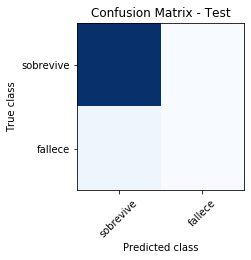

In [39]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(3,4))
        
plt.xticks([0, 1], ['sobrevive', 'fallece'], rotation=45)
plt.yticks([0, 1], ['sobrevive', 'fallece'])
plt.xlabel('Predicted class')
plt.ylabel('True class')

plt.title("Confusion Matrix - Test")

plt.imshow(
    confusion_matrix(y_test[:1000], predict_y), 
    cmap=plt.cm.Blues, 
    interpolation='nearest',
)

plt.show()